<h1>Analise de dados de um solo</h1>

In [37]:
# Importanto as bibliotecas

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
import matplotlib as plt
get_ipython().run_line_magic('matplotlib', 'inline')

In [38]:
# Importando o dataset

solo = pd.read_csv("solos.csv")
solo.head()

,DATENT,NOMPRO,ENDPRO,CIDPRO,CEPPRO,CCPPRO,UFPRO,NOMPRI,LOCPRI,UFPRI,...,FB,QT_ARGILA,QT_SILTE,QT_A_TOTAL,QT_A_GROSS,QT_A_FINA,QT_P_MELI,QT_P_REMAN,NOMCUL,NA
0,30/12/2022,ADELSONDESOUZABRITO,RUAMELANIOGARCIABARBOS,BONITO,79.15,0,MS,FAZ.PRIMAVERA,BONITO,MS,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,S/IDENTIF.,NaN
1,30/12/2022,ADELSONDESOUZABRITO,RUAMELANIOGARCIABARBOS,BONITO,79.15,0,MS,FAZ.PRIMAVERA,BONITO,MS,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,S/IDENTIF.,NaN
2,30/12/2022,ADELSONDESOUZABRITO,RUAMELANIOGARCIABARBOS,BONITO,79.15,0,MS,FAZ.PRIMAVERA,BONITO,MS,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,S/IDENTIF.,NaN
3,30/12/2022,ADELSONDESOUZABRITO,RUAMELANIOGARCIABARBOS,BONITO,79.15,0,MS,FAZ.PRIMAVERA,BONITO,MS,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,S/IDENTIF.,NaN
4,30/12/2022,ADELSONDESOUZABRITO,RUAMELANIOGARCIABARBOS,BONITO,79.15,0,MS,FAZ.PRIMAVERA,BONITO,MS,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,S/IDENTIF.,NaN


In [129]:
# Retirando dados não necessários para a analise

solo_dados = solo.drop(columns=["DATENT", "NOMPRO", "ENDPRO", "CIDPRO", "CEPPRO", "CCPPRO", "UFPRO", "NOMPRI", "LOCPRI", "UFPRI","NUMLAB", "NUMLOT", "NOMCUL", "NA", "IDEAMO", "TIPAMO", "QTDANA"])
solo_dados.head()

,PHCACL2,PHH2O,MO,P,K,CA,MG,PHSMP,AL,S,...,FCU,FMN,FB,QT_ARGILA,QT_SILTE,QT_A_TOTAL,QT_A_GROSS,QT_A_FINA,QT_P_MELI,QT_P_REMAN
0,5.0,5.7,28,6,2.9,9,9,34,0,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,5.1,5.8,28,4,3.6,11,11,28,0,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,5.2,5.9,35,7,5.2,13,11,29,0,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3,4.8,5.6,17,4,1.9,7,7,28,4,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,5.0,5.7,26,5,3.3,9,8,29,0,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [130]:
# Preenchendo os dados faltantes (NaN) com o valor 0 (zero)

solo_dados = solo_dados.fillna(0, inplace = False)

In [131]:
X = solo_dados.iloc[:,:].values
X

array([[ 5. ,  5.7, 28. , ...,  0. ,  0. ,  0. ],
       [ 5.1,  5.8, 28. , ...,  0. ,  0. ,  0. ],
       [ 5.2,  5.9, 35. , ...,  0. ,  0. ,  0. ],
       ...,
       [ 4.1,  4.9, 12. , ...,  0. ,  0. ,  0. ],
       [ 5.3,  6. , 23. , ...,  0. ,  0. ,  0. ],
       [ 5.4,  6.1, 19. , ...,  0. ,  0. ,  0. ]])

In [132]:
Xn = normalize(X)
Xn

array([[0.05860847, 0.06681366, 0.32820744, ..., 0.        , 0.        ,
        0.        ],
       [0.05759558, 0.06550086, 0.31621103, ..., 0.        , 0.        ,
        0.        ],
       [0.05314987, 0.06030466, 0.35773953, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00637854, 0.00762313, 0.0186689 , ..., 0.        , 0.        ,
        0.        ],
       [0.00808729, 0.00915542, 0.03509579, ..., 0.        , 0.        ,
        0.        ],
       [0.00827156, 0.0093438 , 0.02910364, ..., 0.        , 0.        ,
        0.        ]])

In [133]:
kmeans = KMeans(n_clusters = 3, init = 'random')

In [134]:
kmeans.fit(Xn)

c:\Users\mzang\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(init='random', n_clusters=3)

In [135]:
# Verificar centroides ajustados
kmeans.cluster_centers_

array([[ 5.36742341e-02,  6.25236390e-02,  2.24934671e-01,
         4.09235394e-02,  2.31946652e-02,  1.16459673e-01,
         8.14489875e-02,  4.47493089e-01,  5.90783363e-02,
         1.65236299e-01,  2.22002765e-01,  6.69495854e-01,
         3.73518715e-01,  1.66616687e-02,  7.08294503e-02,
         4.60340428e-02,  0.00000000e+00, -8.67361738e-19,
         5.42101086e-19, -2.71050543e-19, -2.03287907e-20,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -3.46944695e-17,
        -4.16333634e-17, -6.93889390e-17,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.63264495e-02,  4.12062485e-02,  1.41120451e-01,
         2.90399848e-02,  1.95267093e-02,  2.86612832e-01,
         1.25144966e-01,  1.74034781e-01,  7.19640775e-03,
         6.67439138e-02,  4.31919008e-01,  6.05953789e-

In [136]:
# Aplicar labels de acordo com o centroide mais proximo
labels = kmeans.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2])

c:\Users\mzang\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mzang\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mzang\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mzang\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

1 7868116.586431902
2 849769.198402951
3 499370.53841904766
4 392034.14812908496
5 318894.9276026245
6 270539.5254674145
7 243124.06338055845
8 227521.2126447272
9 208679.54336825316
10 193380.75876500292


c:\Users\mzang\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mzang\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mzang\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mzang\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

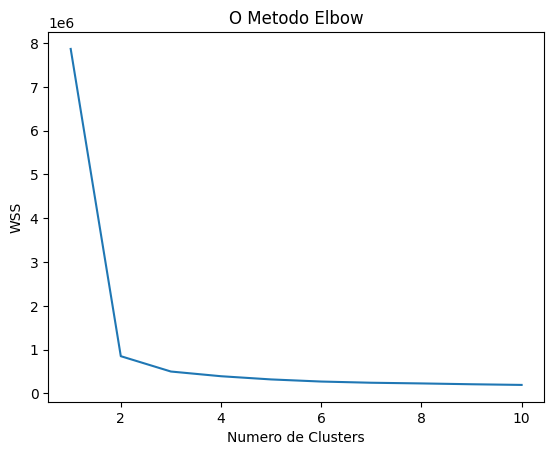

In [137]:
# Aplicando o método Elbow
wcss = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(X)
    print (i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)  
plt.pyplot.plot(range(1, 11), wcss)
plt.pyplot.title('O Metodo Elbow')
plt.pyplot.xlabel('Numero de Clusters')
plt.pyplot.ylabel('WSS') #within cluster sum of squares
plt.pyplot.show()

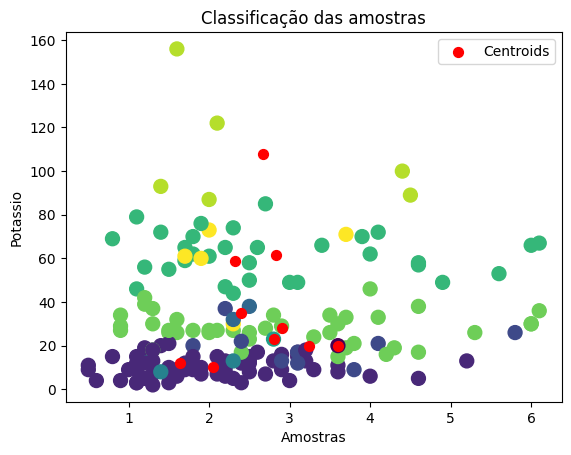

In [139]:
# Visualizando os resultados
plt.pyplot.scatter(X[:, 4], X[:,5], s = 100, c = kmeans.labels_)
plt.pyplot.scatter(kmeans.cluster_centers_[:, 4], kmeans.cluster_centers_[:, 5], s = 50, c = 'red',label = 'Centroids')
plt.pyplot.title('Classificação das amostras')
plt.pyplot.xlabel('Amostras')
plt.pyplot.ylabel('Potassio')
plt.pyplot.legend()
plt.pyplot.show()

In [140]:
kmeans = KMeans(n_clusters = 6, init = 'random')

In [141]:
kmeans.fit(Xn)

c:\Users\mzang\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(init='random', n_clusters=6)

In [142]:
# Verificar centroides ajustados
kmeans.cluster_centers_

array([[ 5.19438548e-02,  6.10380744e-02,  2.15122481e-01,
         4.31954966e-02,  2.24319003e-02,  7.58373301e-02,
         6.26236611e-02,  5.33743587e-01,  8.78660013e-02,
         1.93105245e-01,  1.60704656e-01,  6.94448244e-01,
         2.59365168e-01,  1.39919932e-02,  4.41512351e-02,
         3.53766377e-02,  6.93889390e-18, -4.33680869e-19,
         3.25260652e-19, -1.62630326e-19, -1.35525272e-20,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  6.93889390e-18,
        -4.16333634e-17,  4.16333634e-17,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.43056154e-02,  5.05270167e-02,  1.72812610e-01,
         2.89735048e-02,  2.56530787e-02,  2.28911920e-01,
         1.27931182e-01,  2.09405141e-01,  9.27776532e-03,
         7.26704670e-02,  3.83468278e-01,  5.92873419e-

In [143]:
# Aplicar labels de acordo com o centroide mais proximo
labels = kmeans.labels_
labels

array([4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 4, 3, 4, 4, 4, 4, 0,
       0, 0, 4, 0, 4, 0, 0, 4, 4, 4, 4, 0, 4, 0, 0, 3, 3, 1, 5, 5, 1, 5,
       5, 5, 5, 5, 5, 1, 3, 3, 0, 3, 5, 3, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4,
       3, 5, 5, 1, 1, 3, 1, 1, 0, 1, 1, 1, 4, 1, 5, 5, 5, 5, 3, 5, 1, 3,
       1, 1, 3, 0, 1, 3, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 0, 1, 1, 0,
       3, 5, 5, 5, 5, 5, 1, 3, 1, 1, 0, 5, 5, 5, 5, 1, 5, 4, 1, 3, 5, 1,
       1, 5, 1, 1, 1, 4, 0, 4, 5, 3, 3, 1, 5, 0, 0, 4, 5, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2])

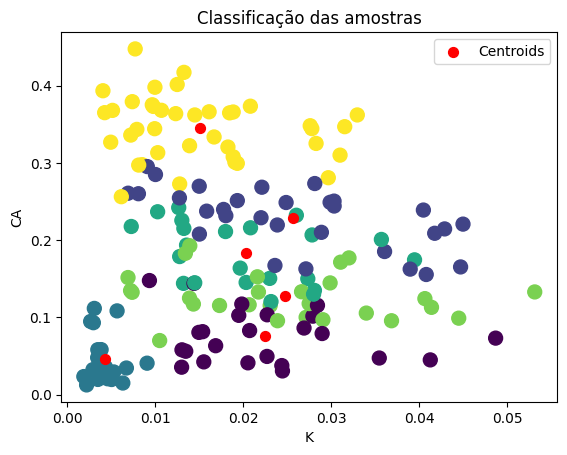

In [149]:
# Visualizando os resultados
plt.pyplot.scatter(Xn[:, 4], Xn[:,5], s = 100, c = kmeans.labels_)
plt.pyplot.scatter(kmeans.cluster_centers_[:, 4], kmeans.cluster_centers_[:, 5], s = 50, c = 'red',label = 'Centroids')
plt.pyplot.title('Classificação das amostras')
plt.pyplot.xlabel('K')
plt.pyplot.ylabel('CA')
plt.pyplot.legend()
plt.pyplot.show()

In [147]:
solo_dados.columns

Index(['PHCACL2', 'PHH2O', 'MO', 'P', 'K', 'CA', 'MG', 'PHSMP', 'AL', 'S',
       'SB', 'CTC', 'V', 'CAMG', 'CAK', 'MGK', 'FE', 'MN', 'ZN', 'CU', 'B',
       'FN', 'FP', 'FK', 'FCA', 'FMG', 'FS', 'FFE', 'FZN', 'FCU', 'FMN', 'FB',
       'QT_ARGILA', 'QT_SILTE', 'QT_A_TOTAL', 'QT_A_GROSS', 'QT_A_FINA',
       'QT_P_MELI', 'QT_P_REMAN'],
      dtype='object')

In [148]:
solo_dados.head()

,PHCACL2,PHH2O,MO,P,K,CA,MG,PHSMP,AL,S,...,FCU,FMN,FB,QT_ARGILA,QT_SILTE,QT_A_TOTAL,QT_A_GROSS,QT_A_FINA,QT_P_MELI,QT_P_REMAN
0,5.0,5.7,28,6,2.9,9,9,34,0,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,5.1,5.8,28,4,3.6,11,11,28,0,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,5.2,5.9,35,7,5.2,13,11,29,0,19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,4.8,5.6,17,4,1.9,7,7,28,4,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,5.0,5.7,26,5,3.3,9,8,29,0,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
